# 미니 프로젝트 : 가위바위보 분류기를 만들자

## 라이브러리 버전 확인하기

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [2]:
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 데이터 준비하기
### 불러오고 Resize하기

In [3]:
!pwd

/aiffel/aiffel/EXPLORATION


In [4]:
print(os.getenv("HOME"))

/aiffel


In [5]:
print(os.getcwd())  # 이거를 path로 주는것도 방법

/aiffel/aiffel/EXPLORATION


In [6]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 70,70 사이즈로 바꾸어 저장
    target_size=(70,70)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")



In [7]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize
scissor_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor"
resize_images(scissor_image_dir_path)

print("가위 이미지 resize 완료!")


1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!


In [8]:
# 바위 이미지
rock_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/rock"
resize_images(rock_image_dir_path)

print("바위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!


In [9]:
# 보 이미지
paper_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/paper"
resize_images(paper_image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


In [10]:
import numpy as np

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합 3000개
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=70
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print("max_x_train_norm: {}".format(np.max(x_train_norm)))

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
max_x_train_norm: 1.0
x_train shape: (3000, 70, 70, 3)
y_train shape: (3000,)


In [11]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


라벨:  0


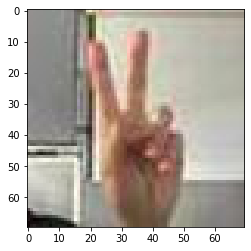

In [12]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  2


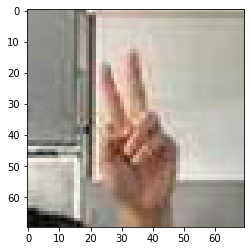

In [13]:
plt.imshow(x_train[10])
print('라벨: ', y_train[2050])

# test data(이미지 섞음)

In [14]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize
scissor_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(scissor_image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [15]:
# 바위 이미지
rock_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_data/rock"
resize_images(rock_image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [16]:
# 보 이미지
paper_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_data/paper"
resize_images(paper_image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [17]:
import numpy as np

def load_data(img_path, number_of_data=400):  # 가위바위보 이미지 개수 총합  600개
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=70
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test_data/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test_data/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("max_x_test_norm: {}".format(np.max(x_test_norm)))


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 400 입니다.
max_x_test_norm: 1.0
x_test shape: (400, 70, 70, 3)
y_test shape: (400,)


In [18]:
print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test))

최소값: 0  최대값: 255


라벨:  0


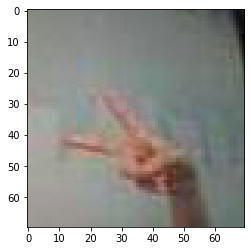

In [19]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [20]:
# 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=16
# n_channel_2=32
# n_train_epoch=10

In [21]:
# from sklearn.model_selection import train_test_split


# x_test, x_val, y_test,y_val = train_test_split(x_test, y_test, test_size =0.2,
#                                               random_state=4, shuffle=False)

## 딥러닝 네트워크 학습시키기
## model 학습

In [22]:
tf.random.set_seed(3)
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (10,10), activation='relu', input_shape=(70,70,3))) # filter  얼마나 다양한 이미지의 특성을 살펴볼 것인가
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(32,(5,5), activation='relu')) 
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) 
model.add(keras.layers.MaxPooling2D((2,2)))

# model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) 
# model.add(keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
# model.add(keras.layers.Dense(512, activation='relu')) # 분류기에 사용되는 뉴런의 숫자, 값이 클수록 복잡한 분류기를 만들 수 있다
model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) #최종 분류기의 class수 가위, 바위,보 니까 3

print('Model에 추가된 Layer 개수: ', len(model.layers)) 

Model에 추가된 Layer 개수:  9


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 61, 61, 16)        4816      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [24]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)  # 옵티마이저 SGD사용 

In [25]:
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
hist = model.fit(x_train, y_train, epochs=15, batch_size=256,shuffle=True) 

Epoch 1/15
12/12 [==============================] - 4s 45ms/step - loss: 16.6422 - accuracy: 0.3713
Epoch 2/15
12/12 [==============================] - 0s 22ms/step - loss: 1.0909 - accuracy: 0.4090
Epoch 3/15
12/12 [==============================] - 0s 22ms/step - loss: 1.0553 - accuracy: 0.3867
Epoch 4/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0315 - accuracy: 0.4670
Epoch 5/15
12/12 [==============================] - 0s 22ms/step - loss: 0.9952 - accuracy: 0.5053
Epoch 6/15
12/12 [==============================] - 0s 22ms/step - loss: 1.0667 - accuracy: 0.4177
Epoch 7/15
12/12 [==============================] - 0s 22ms/step - loss: 1.0932 - accuracy: 0.3700
Epoch 8/15
12/12 [==============================] - 0s 22ms/step - loss: 1.0606 - accuracy: 0.4813
Epoch 9/15
12/12 [==============================] - 0s 22ms/step - loss: 0.9284 - accuracy: 0.6083
Epoch 10/15
12/12 [==============================] - 0s 22ms/step - loss: 0.9495 - accuracy: 0.5297
Epoch 11

In [27]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

13/13 - 0s - loss: 1.0043 - accuracy: 0.6325
test_loss: 1.004256248474121
test_accuracy: 0.6324999928474426


In [28]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.48639965 0.34368014 0.16992028]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


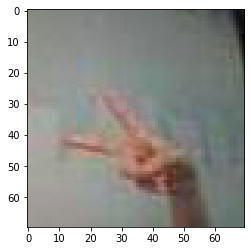

In [29]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


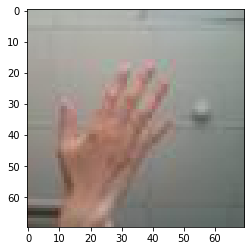

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


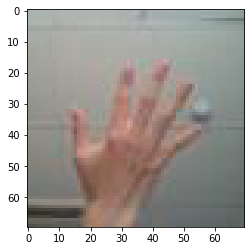

예측확률분포: [0.930936   0.05148679 0.01757731]
라벨: 0, 예측결과: 0


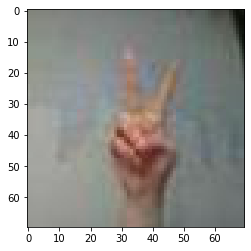

예측확률분포: [0.71467227 0.22780049 0.05752718]
라벨: 0, 예측결과: 0


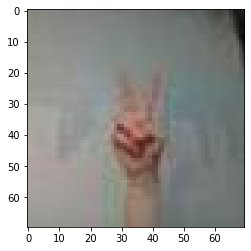

예측확률분포: [0.3074291  0.5190757  0.17349523]
라벨: 1, 예측결과: 1


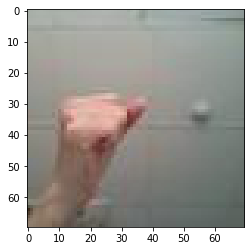

예측확률분포: [0.20056681 0.6548034  0.14462976]
라벨: 1, 예측결과: 1


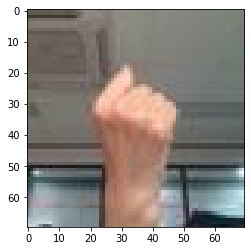

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


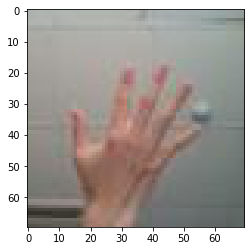

예측확률분포: [0.929868   0.05717507 0.01295693]
라벨: 0, 예측결과: 0


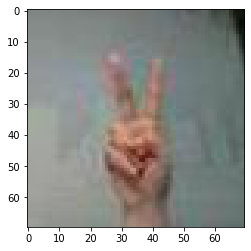

예측확률분포: [0.6875652  0.24791756 0.06451717]
라벨: 0, 예측결과: 0


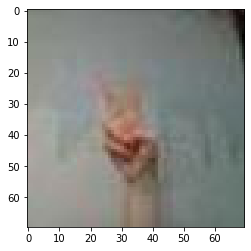

예측확률분포: [0.43531558 0.33668837 0.22799599]
라벨: 0, 예측결과: 0


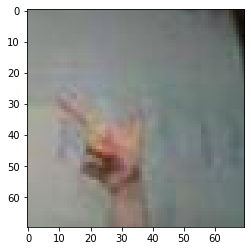

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


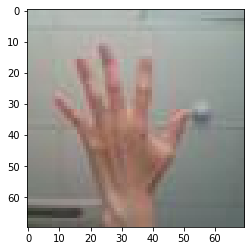

예측확률분포: [0.28912047 0.3880965  0.32278302]
라벨: 1, 예측결과: 1


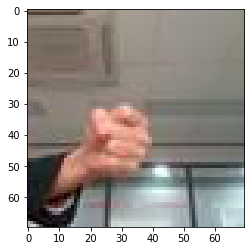

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


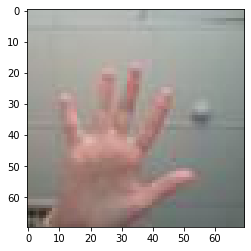

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


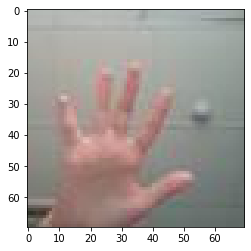

예측확률분포: [0.32900825 0.3277707  0.34322098]
라벨: 2, 예측결과: 2


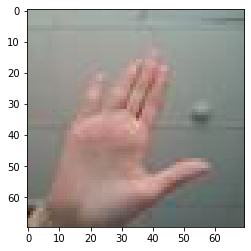

예측확률분포: [0.23685473 0.45955044 0.3035948 ]
라벨: 1, 예측결과: 1


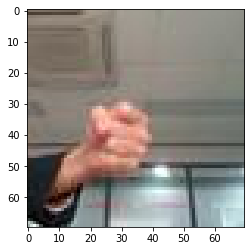

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


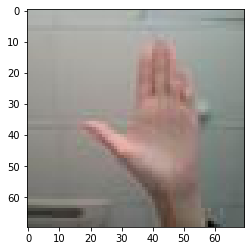

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


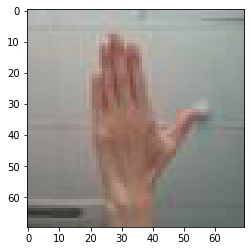

예측확률분포: [0.15408477 0.47512254 0.37079263]
라벨: 1, 예측결과: 1


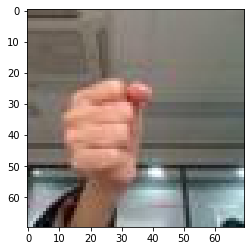

예측확률분포: [0.38144866 0.30738786 0.31116349]
라벨: 0, 예측결과: 0


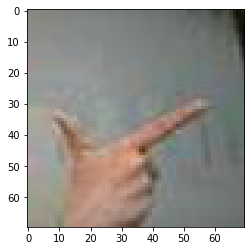

예측확률분포: [0.489753   0.34491366 0.16533333]
라벨: 0, 예측결과: 0


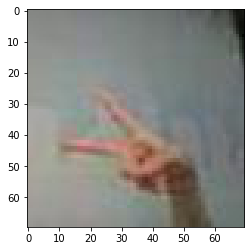

예측확률분포: [0.2839513  0.38405755 0.33199114]
라벨: 1, 예측결과: 1


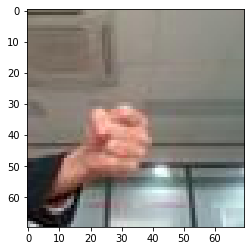

예측확률분포: [0.3295678  0.32590714 0.34452504]
라벨: 2, 예측결과: 2


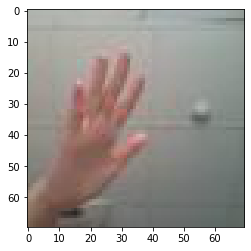

예측확률분포: [0.4570509  0.30327132 0.23967782]
라벨: 0, 예측결과: 0


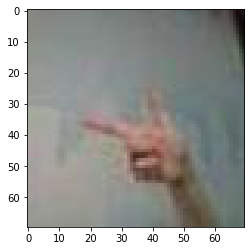

예측확률분포: [0.40686503 0.3792127  0.2139223 ]
라벨: 0, 예측결과: 0


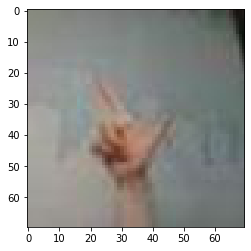

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


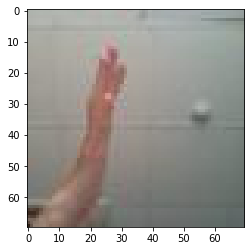

예측확률분포: [0.32901183 0.32810563 0.3428825 ]
라벨: 2, 예측결과: 2


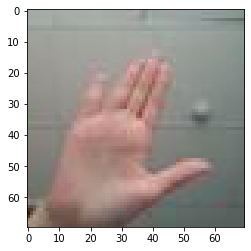

예측확률분포: [0.7028658  0.22497517 0.07215911]
라벨: 0, 예측결과: 0


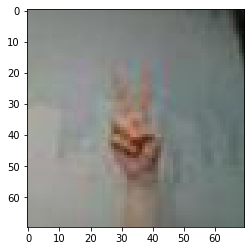

예측확률분포: [0.08726016 0.7864398  0.12630005]
라벨: 1, 예측결과: 1


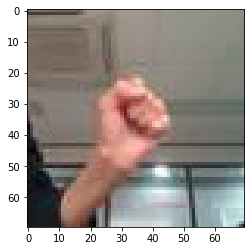

예측확률분포: [0.32956782 0.32590714 0.34452504]
라벨: 2, 예측결과: 2


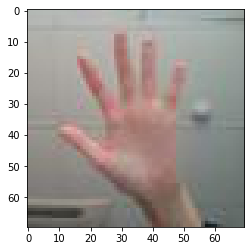

In [30]:
import random

right_predict_list=[]
for i, _ in enumerate(predicted_labels): 
    if predicted_labels[i] == y_test[i]:
        right_predict_list.append(i)


samples = random.choices(population=right_predict_list, k=30)
# 맞은 예측들
for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

틀린 것들
라벨: 1, 예측결과: 0


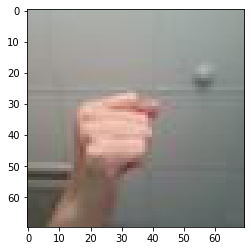

라벨: 1, 예측결과: 0


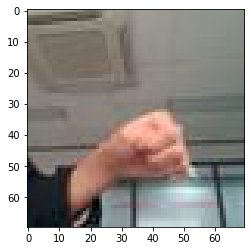

라벨: 0, 예측결과: 2


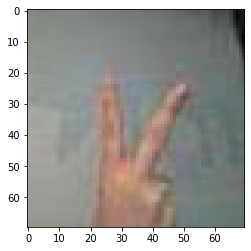

라벨: 1, 예측결과: 0


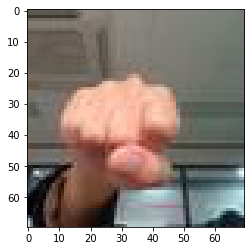

라벨: 0, 예측결과: 2


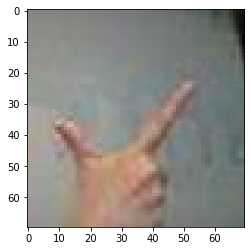

라벨: 0, 예측결과: 1


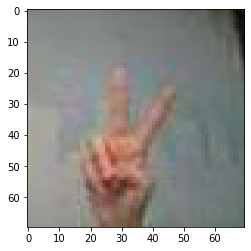

라벨: 1, 예측결과: 0


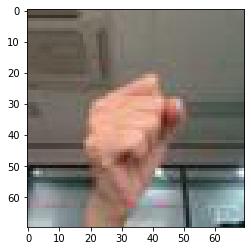

라벨: 0, 예측결과: 2


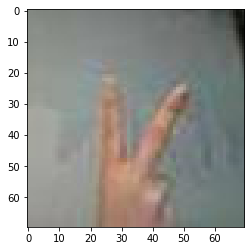

라벨: 1, 예측결과: 0


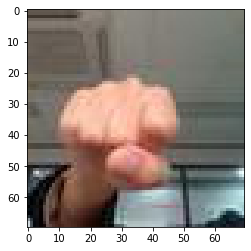

라벨: 0, 예측결과: 2


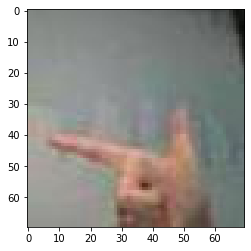

라벨: 0, 예측결과: 2


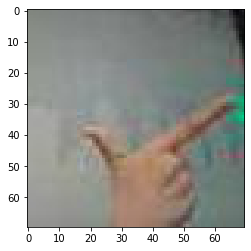

라벨: 0, 예측결과: 2


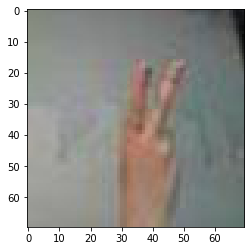

라벨: 1, 예측결과: 0


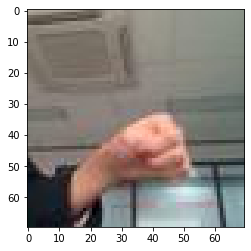

라벨: 1, 예측결과: 0


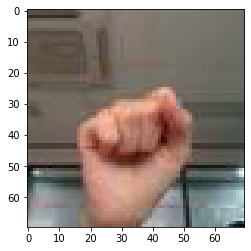

라벨: 1, 예측결과: 0


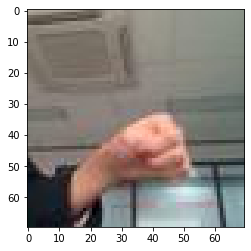

라벨: 0, 예측결과: 2


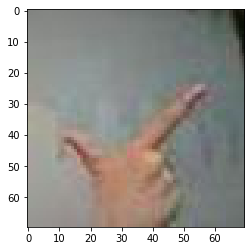

라벨: 1, 예측결과: 0


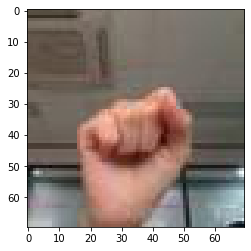

라벨: 0, 예측결과: 2


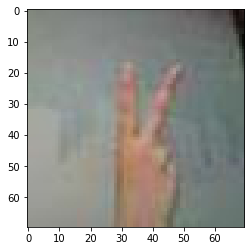

라벨: 0, 예측결과: 2


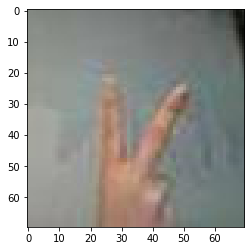

라벨: 0, 예측결과: 2


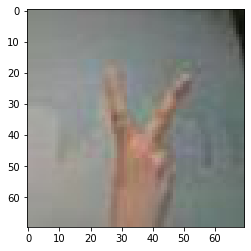

라벨: 0, 예측결과: 2


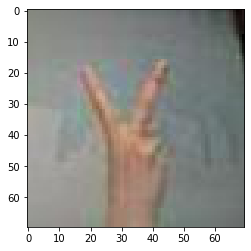

라벨: 0, 예측결과: 2


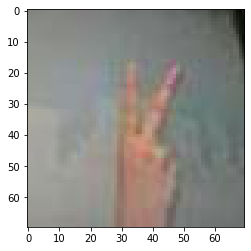

라벨: 0, 예측결과: 1


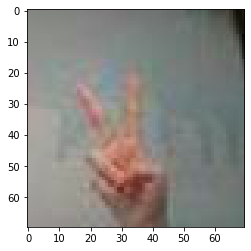

라벨: 1, 예측결과: 0


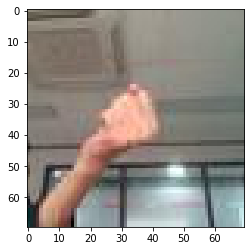

라벨: 1, 예측결과: 0


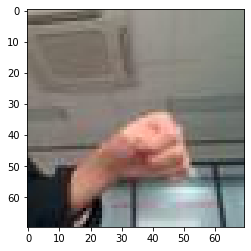

라벨: 0, 예측결과: 2


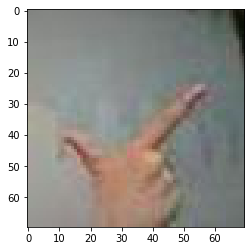

라벨: 1, 예측결과: 2


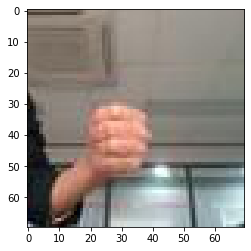

라벨: 1, 예측결과: 0


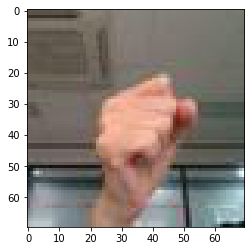

라벨: 0, 예측결과: 2


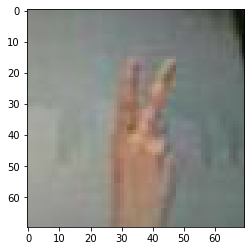

라벨: 0, 예측결과: 2


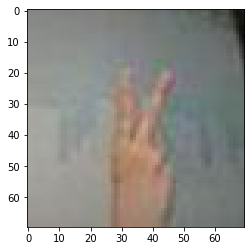

In [31]:
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels): 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)


samples = random.choices(population=wrong_predict_list, k=30)
# 틀린 예측
print("틀린 것들")

for n in samples:
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

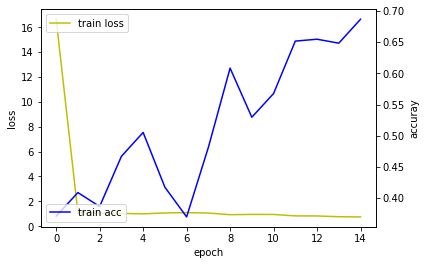

In [32]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 여러가지시도
## (test데이터를 두사람의 데이터로)

In [120]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize
scissor_image_dir_path_1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(scissor_image_dir_path_1)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [121]:
# 바위 이미지
rock_image_dir_path_1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(rock_image_dir_path_1)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


In [122]:
# 보 이미지
paper_image_dir_path_1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(paper_image_dir_path_1)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


In [123]:
import numpy as np

def load_data_1(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합  600개
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=70
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test_2)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



image_dir_path_1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/"
(x_test_2, y_test_2)=load_data_1(image_dir_path_1)
x_test_norm_2 = x_test_2/255.0   # 입력은 0~1 사이의 값으로 정규화
print("max_x_test_norm_2: {}".format(np.max(x_test_norm_2)))


print("x_test_2 shape: {}".format(x_test_2.shape))
print("y_test_2 shape: {}".format(y_test_2.shape))

학습데이터(x_test_2)의 이미지 개수는 600 입니다.
max_x_test_norm_2: 1.0
x_test_2 shape: (600, 70, 70, 3)
y_test_2 shape: (600,)


In [124]:
print('최소값:',np.min(x_test_2), ' 최대값:',np.max(x_test_2))

최소값: 0  최대값: 255


라벨:  0


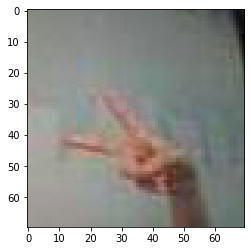

In [125]:
plt.imshow(x_test_2[0])
print('라벨: ', y_test_2[0])

### test2 model 

In [126]:
tf.random.set_seed(5)
model_2=tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Conv2D(16, (10,10), activation='relu', input_shape=(70,70,3)))
model_2.add(keras.layers.MaxPool2D((2,2)))
model_2.add(keras.layers.Conv2D(32,(5,5), activation='relu')) 
model_2.add(keras.layers.MaxPooling2D((2,2)))
model_2.add(keras.layers.Conv2D(64, (3,3), activation='relu')) 
model_2.add(keras.layers.MaxPooling2D((2,2)))


model_2.add(tf.keras.layers.Flatten())
model_2.add(keras.layers.Dense(64, activation='relu'))
model_2.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model_2.layers))

Model에 추가된 Layer 개수:  9


In [127]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 61, 61, 16)        4816      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 32)        12832     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)             

In [128]:
opt_2 = tf.keras.optimizers.SGD(learning_rate=0.001)  

In [129]:
model_2.compile(optimizer=opt_2,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [130]:
hist_2 = model_2.fit(x_train, y_train, epochs=15, batch_size=256,shuffle=True) #70,70 40, 500 56% 30개



Epoch 1/15
12/12 [==============================] - 1s 32ms/step - loss: 136.9235 - accuracy: 0.3320
Epoch 2/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0997 - accuracy: 0.3333
Epoch 3/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0993 - accuracy: 0.3333
Epoch 4/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0992 - accuracy: 0.3333
Epoch 5/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0990 - accuracy: 0.3333
Epoch 6/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0990 - accuracy: 0.3333
Epoch 7/15
12/12 [==============================] - 0s 24ms/step - loss: 1.0989 - accuracy: 0.3333
Epoch 8/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0989 - accuracy: 0.3333
Epoch 9/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0988 - accuracy: 0.3333
Epoch 10/15
12/12 [==============================] - 0s 23ms/step - loss: 1.0988 - accuracy: 0.3333
Epoch 1

In [131]:
test_loss_2, test_accuracy_2 = model_2.evaluate(x_test_2,y_test_2, verbose=2)
print(f"test_loss_2: {test_loss_2}")
print(f"test_accuracy_2: {test_accuracy_2}")

19/19 - 0s - loss: 1.0986 - accuracy: 0.3333
test_loss_2: 1.0986146926879883
test_accuracy_2: 0.3333333432674408


In [132]:
predicted_result_2 = model_2.predict(x_test_2)  # model이 추론한 확률값
predicted_labels_2 = np.argmax(predicted_result_2, axis=1)

idx=0  #1번째 x_test
print('model_2.predict() 결과 : ', predicted_result_2[idx])
print('model_2이 추론한 가장 가능성이 높은 결과 : ', predicted_labels_2[idx])
print('실제 데이터의 라벨 : ', y_test_2[idx])

model_2.predict() 결과 :  [0.3342801  0.33316678 0.33255312]
model_2이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


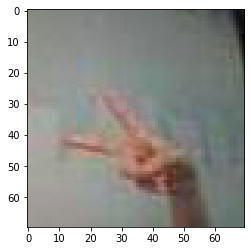

In [133]:
plt.imshow(x_test_2[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


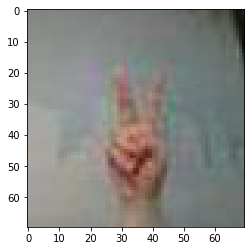

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


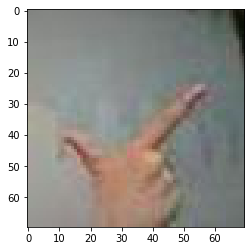

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


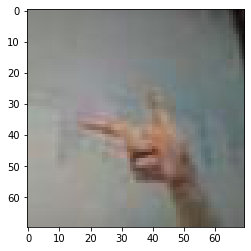

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


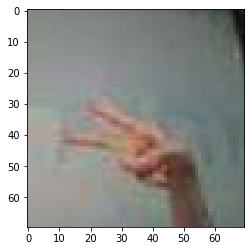

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


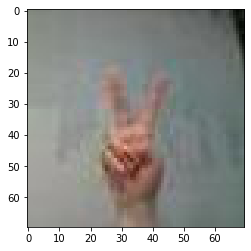

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


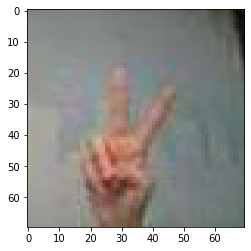

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


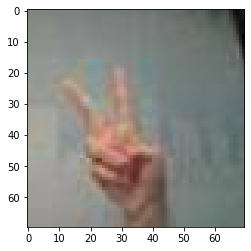

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


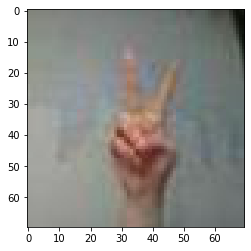

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


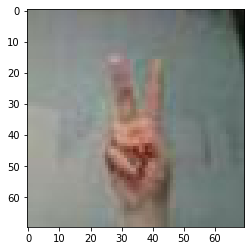

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


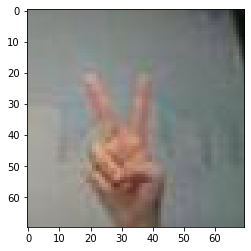

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


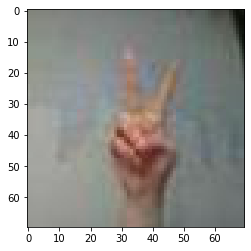

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


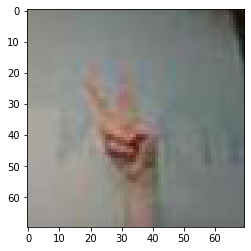

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


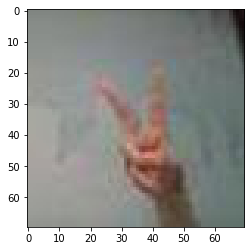

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


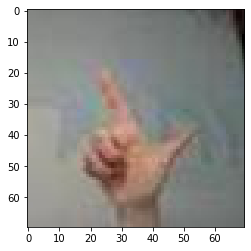

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


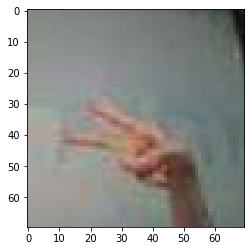

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


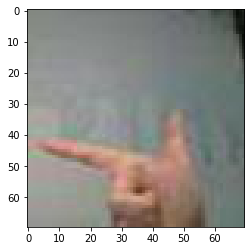

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


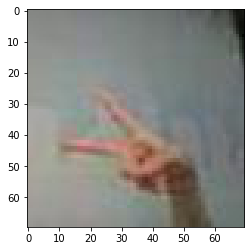

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


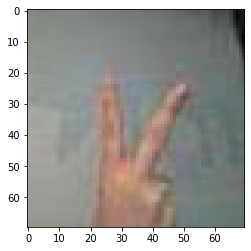

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


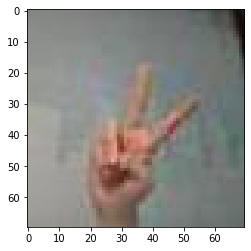

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


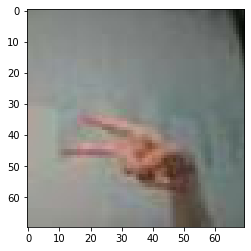

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


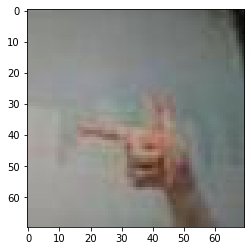

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


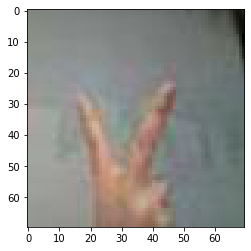

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


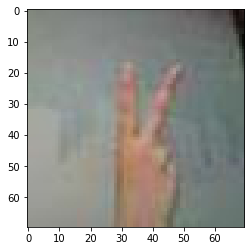

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


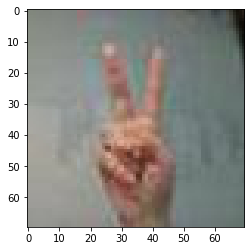

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


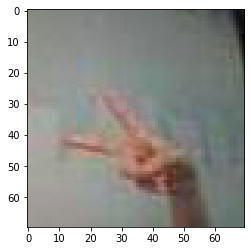

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


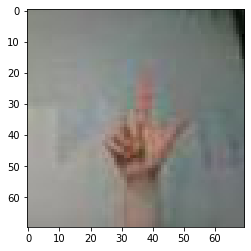

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


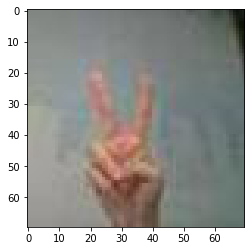

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


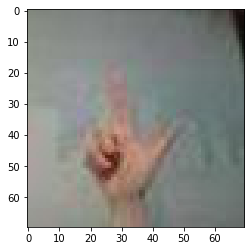

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


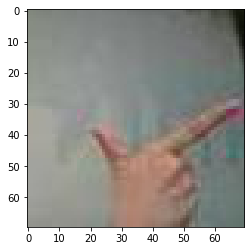

예측확률분포: [0.3342801  0.33316678 0.33255312]
라벨: 0, 예측결과: 0


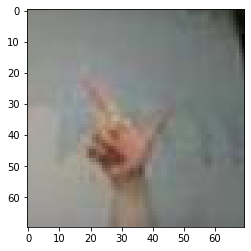

In [134]:
import random

right_predict_list_2=[]
for i, _ in enumerate(predicted_labels_2): 
    if predicted_labels_2[i] == y_test_2[i]:
        right_predict_list_2.append(i)


samples_2 = random.choices(population=right_predict_list_2, k=30)
# 맞은 예측들
for n in samples_2:
    print("예측확률분포: " + str(predicted_result_2[n]))
    print("라벨: " + str(y_test_2[n]) + ", 예측결과: " + str(predicted_labels_2[n]))
    plt.imshow(x_test_2[n], cmap=plt.cm.binary)
    plt.show()

틀린 것들
라벨: 1, 예측결과: 0


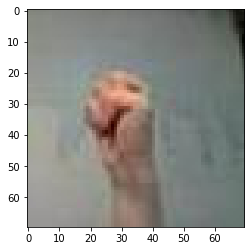

라벨: 2, 예측결과: 0


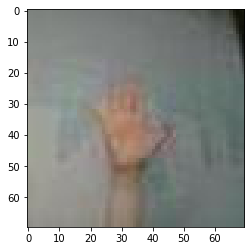

라벨: 1, 예측결과: 0


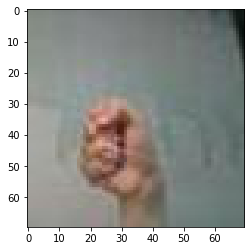

라벨: 2, 예측결과: 0


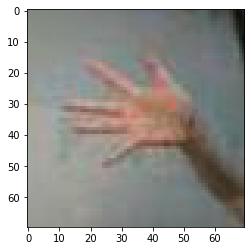

라벨: 1, 예측결과: 0


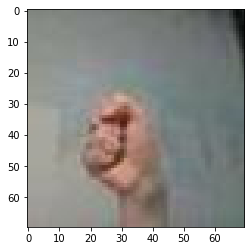

라벨: 1, 예측결과: 0


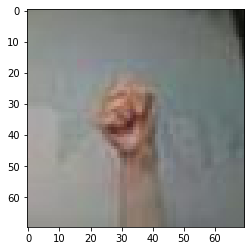

라벨: 1, 예측결과: 0


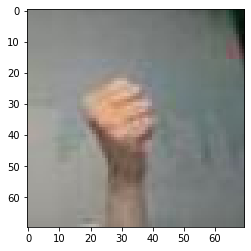

라벨: 1, 예측결과: 0


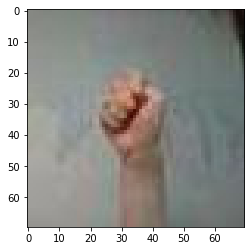

라벨: 2, 예측결과: 0


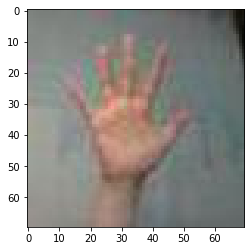

라벨: 1, 예측결과: 0


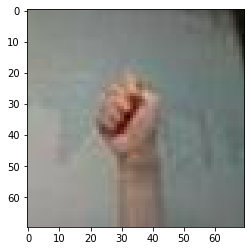

라벨: 2, 예측결과: 0


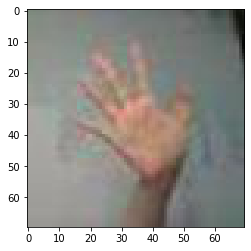

라벨: 1, 예측결과: 0


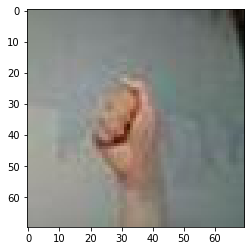

라벨: 1, 예측결과: 0


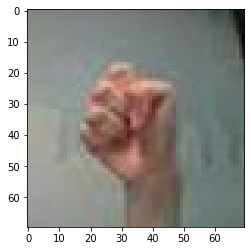

라벨: 1, 예측결과: 0


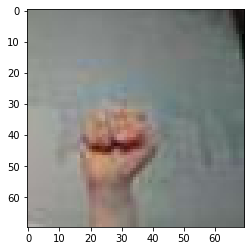

라벨: 1, 예측결과: 0


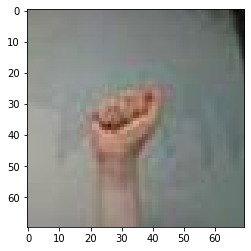

라벨: 2, 예측결과: 0


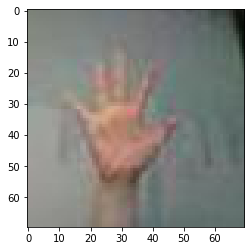

라벨: 2, 예측결과: 0


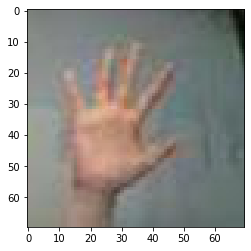

라벨: 2, 예측결과: 0


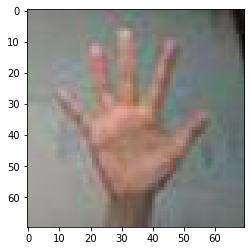

라벨: 2, 예측결과: 0


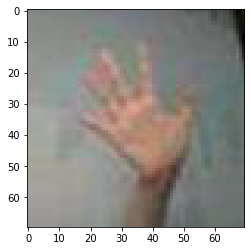

라벨: 1, 예측결과: 0


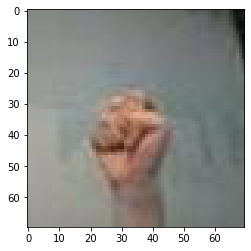

라벨: 1, 예측결과: 0


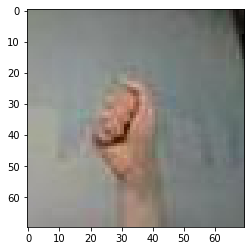

라벨: 2, 예측결과: 0


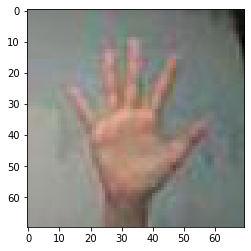

라벨: 1, 예측결과: 0


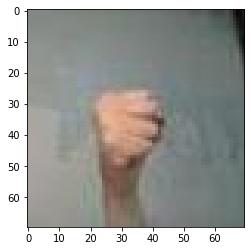

라벨: 1, 예측결과: 0


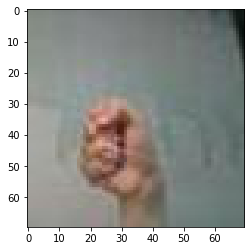

라벨: 1, 예측결과: 0


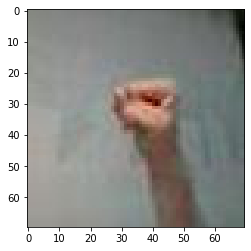

라벨: 1, 예측결과: 0


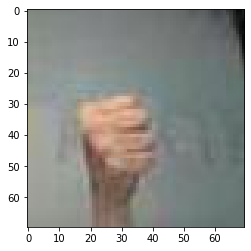

라벨: 1, 예측결과: 0


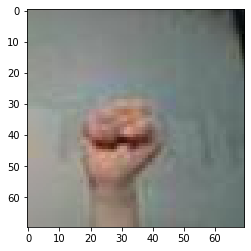

라벨: 2, 예측결과: 0


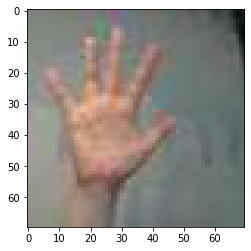

라벨: 1, 예측결과: 0


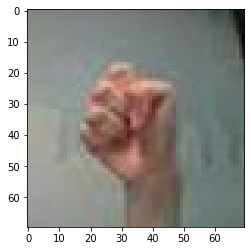

라벨: 2, 예측결과: 0


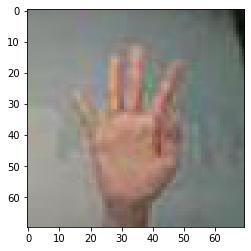

In [135]:
wrong_predict_list_2=[]
for i, _ in enumerate(predicted_labels_2): 
    if predicted_labels_2[i] != y_test_2[i]:
        wrong_predict_list_2.append(i)


samples_2 = random.choices(population=wrong_predict_list_2, k=30)
# 틀린 예측
print("틀린 것들")

for n in samples_2:
    print("라벨: " + str(y_test_2[n]) + ", 예측결과: " + str(predicted_labels_2[n]))
    plt.imshow(x_test_2[n], cmap=plt.cm.binary)
    plt.show()

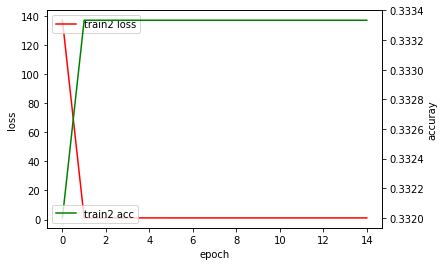

In [136]:
%matplotlib inline

fig, loss_ax_2 = plt.subplots()

acc_ax_2 = loss_ax_2.twinx()

loss_ax_2.plot(hist_2.history['loss'], 'r', label='train2 loss')

acc_ax_2.plot(hist_2.history['accuracy'], 'g', label='train2 acc')

loss_ax_2.set_xlabel('epoch')
loss_ax_2.set_ylabel('loss')
acc_ax_2.set_ylabel('accuray')

loss_ax_2.legend(loc='upper left')
acc_ax_2.legend(loc='lower left')

plt.show()

같은 옵티마이저, 동일한 파라미터 값을 사용했고

test 데이터가 조금 달랐을 뿐인데, 결과값이 다르다!

# 회고

- 이번 프로젝트에서 **어려웠던 점,**

이번 프로젝트에서 제일 어려웠던건 당연 루브릭 3번 test accuracy가 60이상이 되도록 하는것이었다.

이미지를 여러가지로 바꿔가며 시도해보기도 하고 다양한 파라미터 값을 변경해보기도하며 시간을 투자했었다.

처음에는 당연히 잘 나오겠지 하는 마음이었는데, 여러가지 값을 바꿔보면서 시도해보다가 높은 수치를 기록한 파라미터의 값을 잊어버려서 처음부터 다시 시작하는 마음으로 프로젝트를 진행하기도 했다.



- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.

100% 확실하다고는 할 수 없지만,

이미지의 사이즈가 결과에 영향을 미치는 것 같았다. 이미지 사이즈를 줄여나갈때 정확도가 조금씩 높아지는것을 알 수 있었다. 물론 다른 하이퍼파라미터 값도 변경했지만, 비슷한 수치인 상황에서는 이미지의 사이즈가 작은것이 더 좋은 결과를 보여주었다.


여러가지 값을 변경해보면서 배치 사이즈와 lr이 어떤 상관관계를 가지는지가 궁금했었다.

검색하다 우연히 배치 사이즈를 높이는것이 lr을 낮추는것이라는 글을 보게되었는데, 정확도를 낮추느라 자세히 알아보지는 못했다..

레이어도 쌓아보고 이미지 사이즈도 변경해보고 파라미터 값도 바꾸다가 우연히 shuffle을 사용해 보았는데, 
결과가 test_accuracy: 0.6324999928474426로 나왔다. 
shuffle에 대해서 알아 보아야겠다.

- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.

간단하게라도 train loss와 train acc로 그래프를 그려보려고 했다.

정규화와 데이터셋의 다양성도 시도해보았고 분류모델의 test accuracy가 

test_accuracy: 0.6324999928474426 

로 기준치에 도달하였다.

- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.

아쉬운건 그래프에서 val_loss, val_acc를 해보고싶었는데 완성하지 못해서 주석을 처리해 그 부분이 조금 아쉽다



- **자기 다짐**

이번 가위바위보 프로젝트를 하면서 많은 시행착오를 겪었었다.

값 하나가 바뀔때마다 정확도라 달라지면서 굉장히 고생했는데,

돌이켜보니 정확도의 기준치를 맞추는데에 집중해서 conv2d가 무엇인지 들어가는 값이 무엇인지 등
사용한 것들이 어떤것을 의미하는지를 미처 파악하지 못했었다.

그런 부분들을 생각하고 앞으로는 쓰임에 집중해 공부를 할 수 있도록 노력해야겠다.